# An overview of supervised classification techniques with case study :
## Predicting chronic kidney disease from data

## Introduction

We will go through the entire data pipeline from data cleaning, preprocessing, staging and modelling on a relatively small dataset (400 entries). We will compare different machine learning models and try to measure their performance using various metrics.

Summary
* It is a classification problem
* Features include numerical values and categorical values
* Need to impute missing numerical values
* Need to impute missing categorical values
* Categorical features need to be converted to numerical using the encoding methods
* Find the correlation between the features
* Find the distribution of numerical features and normalise if required
* Model the prediction with different linear and non-linear classifiers
* Evaluate the model using cross validation methods(k-fold)
* Fine tune the hyper parameters using grid search and compare the accuracy
* Select important features and model and compare the accuracy
* Finalise the model

## Dataset

The dataset for this problem is the CKDPD (Chronick Kidney Disease Patient Dataset) provided as part of the assignment. Number of instances are 400. It is a multivariate data set, containing 24 variables that are age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc, htn, dm, cad, appet, pe and ane. All values are real integers. This data set contains 250 chronic kidney disease patient records and 150 non chronic kidney disease patient records.The data set was provided as part of the assignment along with the feature attributes information.

## Load the libraries

In [1]:
# #%%md
# ## Install libraries if not already installed
# #%%
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn_pandas
!pip install xgboost
!pip install Ipython
!pip install scipy

In [1]:
# We will need following libraries to start with and shall load the libraries required as we go along
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import mode
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')
# We have seen and considered the warnings. To improve readability of the results, let us ignore the warnings. 

## Load Data
Load the data from the spreadhseet provided to a pandas dataframe

In [12]:
# Loading the CKPD dataset
df = pd.read_csv("kidneyChronic.csv")
df_disease = df['class']
df_headings = df.columns.tolist()

----
## Exploratory Data Analysis


In [13]:
df.shape # rows, columns of original dataset

(400, 25)

In [14]:
df.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


Missing values are depicted with '?'

Features:
* age		-	age	
* bp		-	blood pressure
* sg		-	specific gravity
* al		-   albumin
* su		-	sugar
* rbc		-	red blood cells
* pc		-	pus cell
* pcc		-	pus cell clumps
* ba		-	bacteria
* bgr		-	blood glucose random
* bu		-	blood urea
* sc		-	serum creatinine
* sod		-	sodium
* pot		-	potassium
* hemo	    -	hemoglobin
* pcv		-	packed cell volume
* wc		-	white blood cell count
* rc		-	red blood cell count
* htn		-	hypertension
* dm		-	diabetes mellitus
* cad		-	coronary artery disease
* appet	    -	appetite
* pe		-	pedal edema
* ane		-	anemia
* class	    -	class	

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null object
bp       400 non-null object
sg       400 non-null object
al       400 non-null object
su       400 non-null object
rbc      400 non-null object
pc       400 non-null object
pcc      400 non-null object
ba       400 non-null object
bgr      400 non-null object
bu       400 non-null object
sc       400 non-null object
sod      400 non-null object
pot      400 non-null object
hemo     400 non-null object
pcv      400 non-null object
wbcc     400 non-null object
rbcc     400 non-null object
htn      400 non-null object
dm       400 non-null object
cad      400 non-null object
appet    400 non-null object
pe       400 non-null object
ane      400 non-null object
class    400 non-null object
dtypes: object(25)
memory usage: 78.2+ KB


All columns have dtype object irrespective of numerical or categorical values.
There are missing values represented by '?'.

----
## Preprocessing Data


### 1. Trimming the whitespaces in the data

In [16]:
for column in df.columns:
    df[column] = df[column].astype(str).str.strip()   # trim the string of white spaces

### 2. Removing duplicates
Duplicates rows can be present in data due to various reasons. The question about whether duplicates should be removed or not depends on the particular problem setting and context. For example - In linear regression, if you have duplicate rows, then the underlying assumption about standard error terms being uncorrelated will be violated, which will lead our model to underestimate the actual standard errors. Thus, duplicates must be removed in that case.

In our case, removing duplicates makes sense, as most likely it is possible that someone entered the data for a patient multiple times.

In [17]:
df = df[~df.duplicated(subset = None, keep = 'first')]
# Here, keep = 'first' ensures that only the first row is taken into the final dataset.
# The '~' sign tells pandas to keep all values except the 13 duplicate values
df.shape

(400, 25)

In [18]:
df_duplicate = df[df.duplicated(keep = False)] # keep = False gives you all rows with duplicate entries
df_duplicate

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class


There are no duplictes

### 3. Applying the appropriate data type to the features
Currently all attributes are of type object. Convert numerical attirbutes to numerical data type and categorical/nominal to category datatye

In [19]:
numerical_cols = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']   # given in the dataset information
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
df_numerical_features = df[numerical_cols].copy() 

categorical_cols = ['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane', 'class'] # given
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

df_categorical_features =df[['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane', 'class']].copy()
df_categorical_features = df[categorical_cols].copy() 
# df_categorical_features[df_categorical_features.select_dtypes(['object']).columns] = df_categorical_features.select_dtypes(['object']).apply(lambda x: x.astype('category'))
# df_categorical_features.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       400 non-null category
al       400 non-null category
su       400 non-null category
rbc      400 non-null category
pc       400 non-null category
pcc      400 non-null category
ba       400 non-null category
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      400 non-null category
dm       400 non-null category
cad      400 non-null category
appet    400 non-null category
pe       400 non-null category
ane      400 non-null category
class    400 non-null category
dtypes: category(14), float64(11)
memory usage: 45.0 KB


### 4. Handling missing values
1. Replace ? with NaN
2. Fill the null values in the numerical features with median value
3. Fill the null values in the categorical features with mode (most frequently occuring value)

#### Check missing values

In [20]:
# We shall replace ? with NaN
df.replace('?', np.NaN, regex=False,inplace=True)
df.to_csv("df_afterqreplaced.csv", sep=',', index=False)
# print(df_features.isnull().sum())

In [21]:
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_columns = mis_val_table_columns[
        mis_val_table_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Dataset has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_columns

In [41]:
missing_values_table(df)

Dataset has 25 columns.
There are 24 columns that have missing values.


,Missing Values,% of Total Values
rbc,152,38.00
rbcc,131,32.75
wbcc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


In [42]:
# We loop through the features and fill in the missing values based on the data type as below
    # median for numerical attirbutes
    # mode for categorical attributes
for column in df.columns:
    if df[column].dtype == np.float64:
        df[column] = df[column].fillna(df[column].median())
    else:
#         df[column] = df[column].astype(str).str.strip()   # trim the string of white spaces
        df[column] = df[column].fillna(df[column].mode()[0])        
# df.to_csv("df_missingvalueshandled.csv", sep=',', index=False)
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

### 5. Finding the correlation between the features
We shall find the correlation between the features and plot them as heatmap. 
Diagonals will have the correlation value of 1, as the feature is correlated with itself. 
Any other element close to 1 will mean the two features are correlated. 

In [43]:
# import seaborn as sns
# SMALL_SIZE = 15
# MEDIUM_SIZE = 22
# BIGGER_SIZE = 27

# plt.figure(figsize=(40,20))
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [44]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1,0.136316,0.230731,0.194291,0.133985,-0.0860401,0.0493991,-0.178308,-0.212796,0.0937945,-0.203199
bp,0.136316,1,0.15018,0.180841,0.143184,-0.100705,0.0636671,-0.279303,-0.289237,0.0221768,-0.219317
bgr,0.230731,0.15018,1,0.118859,0.0688864,-0.130569,0.0527317,-0.254435,-0.2582,0.119881,-0.214094
bu,0.194291,0.180841,0.118859,1,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.0383623,-0.465243
sc,0.133985,0.143184,0.0688864,0.581517,1,-0.624036,0.204751,-0.342492,-0.338611,-0.0103334,-0.321737
sod,-0.0860401,-0.100705,-0.130569,-0.308806,-0.624036,1,0.0696122,0.331483,0.343555,0.00800996,0.313929
pot,0.0493991,0.0636671,0.0527317,0.339771,0.204751,0.0696122,1,-0.0964281,-0.117795,-0.0755627,-0.118226
hemo,-0.178308,-0.279303,-0.254435,-0.541635,-0.342492,0.331483,-0.0964281,1,0.84749,-0.137978,0.667512
pcv,-0.212796,-0.289237,-0.2582,-0.523091,-0.338611,0.343555,-0.117795,0.84749,1,-0.175226,0.693473
wbcc,0.0937945,0.0221768,0.119881,0.0383623,-0.0103334,0.00800996,-0.0755627,-0.137978,-0.175226,1,-0.153776


From the heatmap we could see that hemo and pcv are strongly correlated(0.9), hemo and rbcc are correlated(0.8), pcv and rbcc are correlated(0.69). This means that hemo is an important feature.
Note: We are not removing the features in the study. 

### 6. Encoding categorical values with numerals


#### Dealing with categorical features
One-hot encoding is a popular method that can be used when the different values of features do not have any inherent ordering.
If we know of some ordering (such as a feature which has possible values 'Small', 'Medium', 'Large'), then using the method LabelEncoder can make more sense.
Here we use pd.get_dummies() method to one-hot encode the features.

In [45]:
for column in df.columns:
    if df[column].dtype != np.float64:
        df[column] = df[column].astype(str).str.strip()   # trim the string of white spaces        
        df_ohe = pd.get_dummies(df[column], prefix=column)
        df = df.drop(column, axis=1)   # we do not need the original column
        df = pd.concat([df, df_ohe], axis=1) # add the encoded columns to the dataset       
# df.to_csv("df_imputed.csv", sep=',', index=False)
df.head(10)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,class_ckd,class_notckd
0,48.0,80.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,...,1,0,1,0,1,0,1,0,1,0
1,7.0,50.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,...,1,0,1,0,1,0,1,0,1,0
2,62.0,80.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,...,1,0,0,1,1,0,0,1,1,0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,...,1,0,0,1,0,1,0,1,1,0
4,51.0,80.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,...,1,0,1,0,1,0,1,0,1,0
5,60.0,90.0,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,...,1,0,1,0,0,1,1,0,1,0
6,68.0,70.0,100.0,54.0,24.0,104.0,4.0,12.4,36.0,8000.0,...,1,0,1,0,1,0,1,0,1,0
7,24.0,80.0,410.0,31.0,1.1,138.0,4.4,12.4,44.0,6900.0,...,1,0,1,0,0,1,1,0,1,0
8,52.0,100.0,138.0,60.0,1.9,138.0,4.4,10.8,33.0,9600.0,...,1,0,1,0,1,0,0,1,1,0
9,53.0,90.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,...,1,0,0,1,1,0,0,1,1,0


### 7. Outlier Detection

#### Z-Score calculation
Calculate the Z-score. If we drop the outliers and retain the tuples where the z score is < 3, then we would be dropping 112 tuples. Not dropping the outliers produced the accuracy of 100%. Dropping the outliers give us the accuracy of 98.25 by RandonForest classifier and with 10 most imporatant features, we get the accuracy of 92.5%

In [46]:
from scipy import stats
z = np.abs(stats.zscore(df))
# print(z)
threshold = 3
# print(np.where(z > 3))
df = df[(z < 3).all(axis=1)]   
df.shape

(284, 50)

Draw the boxplot for the numerical features

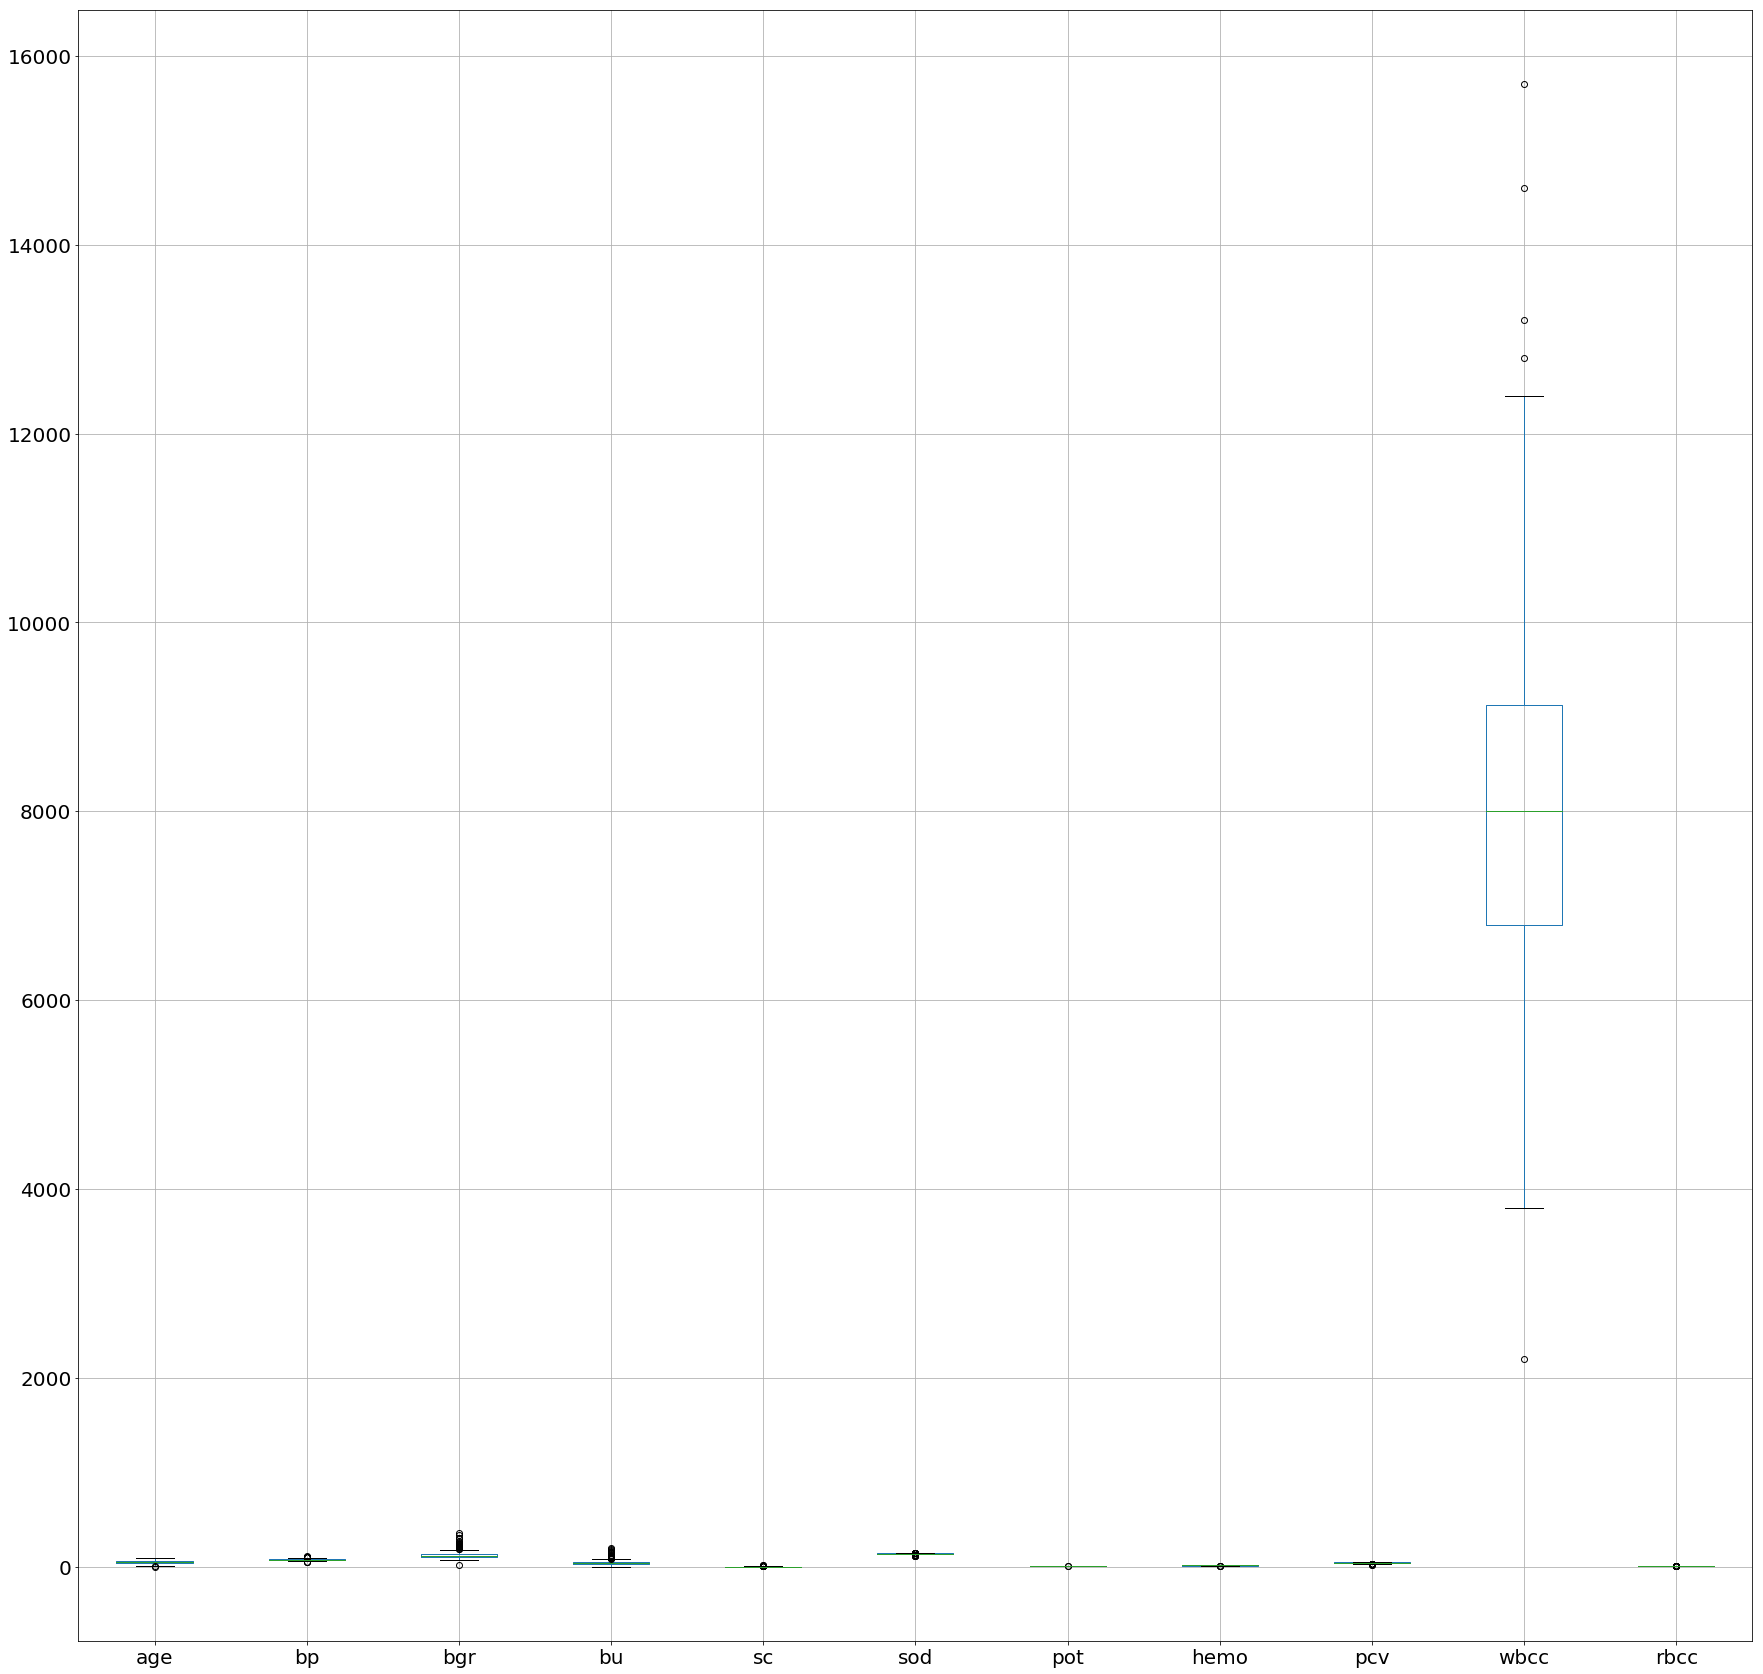

In [47]:
boxplot = df.boxplot(column=['age', 'bp', 'bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc'], fontsize = 20, figsize=(30,30))

### 7. Log transform certain features

We need to check if any features have skewed distribution and apply a log transformation on those features. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170D56A7DA0>,
      dtype=object)

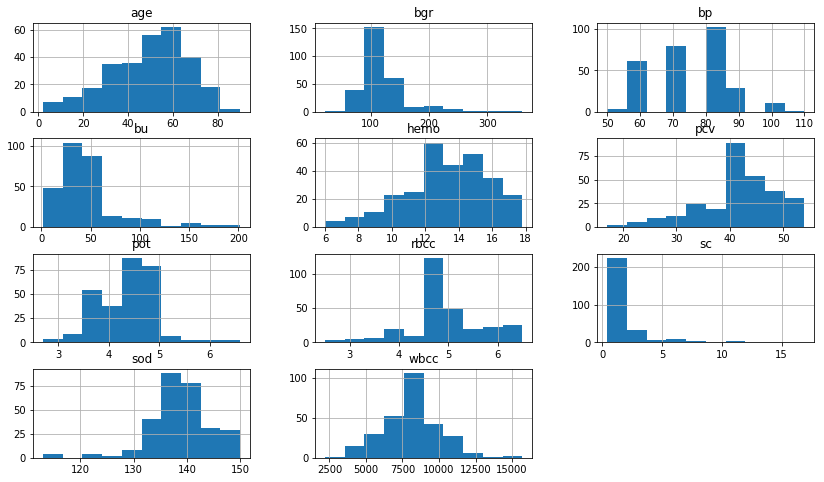

In [48]:
# Visualize skewed continuous features of original data
df[numerical_cols].hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170D59F8198>,
      dtype=object)

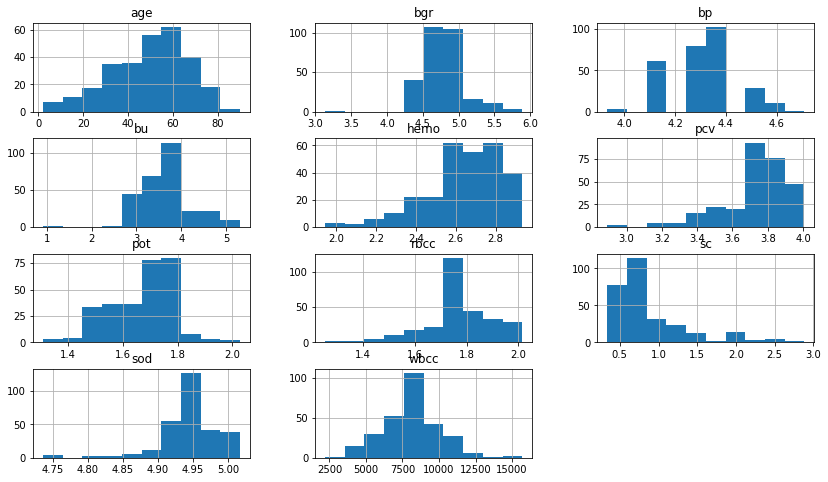

In [49]:
skewed = ['bp', 'bgr','bu','sc','sod','pot','hemo','pcv','rbcc']
df[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
df[numerical_cols].hist(figsize=(14,8))

### 8. Scaling of features

Standardization (subtracting mean and scaling variance) is required for many methods like regularized linear regression, K-NearestNeighbors. One can use following scaling methods - 

1. MinMaxScaler - It preserves zero entries if the feature matrix is sparse, and is also robust to small values of S.D. for features.

2. StandardScaler - Center around zero, change variance to 1.

3. RobustScaler - Useful if there are a lot of outliers in data, this method uses percentiles to center and scale data.

Normalizing, on the other hand, causes one row of the input (one sample) to have unit norm. This is useful for Gram matrix entries in kernel methods.


We use StandardScaler. 

ToDo: Repeat with MinMaxScaler

In [50]:
from sklearn import preprocessing

df_columns = list(df.columns.values)

scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data)
df = pd.DataFrame(df.values, columns = df_columns)
# df.to_csv("df_scaled.csv", sep=',', index=False)

## Modelling


### 1. Prepare the training data and test data

In [51]:
# disease = disease[:]['ckd'] # disease means '1', healthy means '0'
# disease

In [52]:
# Import train_test_split
from sklearn.model_selection import train_test_split, ShuffleSplit
disease= df['class_ckd'].copy()  # copy one of the encoded columns of the class label
lab_enc = preprocessing.LabelEncoder()
disease_encoded = lab_enc.fit_transform(disease)

# drop the one hot endocded columns of the class label
df = df.drop('class_notckd', axis = 1)
df = df.drop('class_ckd', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df, disease_encoded, test_size = 0.2, random_state = 7)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))
# X_train.to_csv("training_data.csv", sep=',', index=False)
# X_test.to_csv("test_data.csv", sep=',', index=False)

Training set has 227 samples.
Testing set has 57 samples.


### 2. Baseline Predictor

Before applying any supervised learning technique, we will implement a naïve predictor, that will simply return that every data point has ‘Disease’= True. We will check our metrics(accuracy, TPR, FPR) on that predictor.

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#naive accuracy, assuming that we predict everyone has disease
positive_disease= (disease_encoded == 1)
positive_disease.astype(int) # convert boolean array to float
report = classification_report(positive_disease, disease_encoded)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       150
        True       1.00      1.00      1.00       134

   micro avg       1.00      1.00      1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284



### 3. Cross validation with XGBoost and Feature importance

In [54]:
# XGB
import xgboost as xgb

# Instantiate XGBClassifier
xgb_cl = xgb.XGBClassifier()

In [55]:
# cross validation score
cv_scores = cross_val_score(xgb_cl, df, disease_encoded, scoring='roc_auc', cv=3)

In [56]:
# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.9903703703703703


In [57]:
# fit the model
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

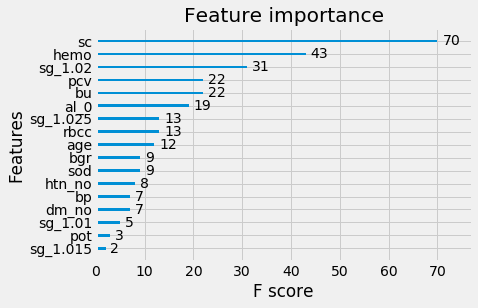

In [58]:
# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(xgb_cl)

### 4. Train and predict using the different classifiers

#### Define the common function for modelling

In [59]:
from sklearn.metrics import fbeta_score, accuracy_score
import time
def train_predict(learner, X_train, y_train, X_test, y_test): 
    results = {}

    start = time.time() # Get start time
    learner.fit(X_train, y_train)
    end = time.time() # Get end time
    
    results['train_time'] = end - start
        
    start = time.time() 
    predictions_test = learner.predict(X_test)# predictions on test set
    predictions_train = learner.predict(X_train)# predictions on first 200 elements of training set
    end = time.time()
    
    results['pred_time'] = end - start
    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=2)
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=2)
       
#     print ("{} trained on the sample".format(learner.__class__.__name__))
    
#     print(classification_report(predictions_test, y_test))
#     print("Accuracy on test set: %0.2f " % accuracy_score(predictions_test, y_test)) 
        
    return results

#### Supervised Learning Approach
We will use the following supervised learning approaches for this problem:
1. Logistic Classification: Since the outcome is binary and we have a reasonable number of examples at our disposal compared to number of features, this approach seems suitable. At the core of this method is a logistic or sigmoid function that quantifies the difference between each prediction and its corresponding true value.                                                       

2. Liner Discriminat Analysis: Two-Class Problems. Logistic regression is intended for two-class or binary classification problems. It can be extended for multi-class classification, but is rarely used for this purpose. Unstable With Well Separated Classes. Logistic regression can become unstable when the classes are well separated. Unstable With Few Examples. Logistic regression can become unstable when there are few examples from which to estimate the parameters. Linear Discriminant Analysis does address each of these points and is the go-to linear method for multi-class classification problems. Even with binary-classification problems, it is a good idea to try both logistic regression and linear discriminant analysis. 

3. Support Vector Machine:   SVM aims to find an optimal hyperplane that separates the data into different classes.                                  
4. Decision Tree: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

5. k Nearest Neighbors: It uses the k closest neighbors of a data point to determine which class should that data point belong to.

6. Naive Bayes: Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. Naive Bayes classifiers work well in many real-world situations such as document classification and spam filtering.

7. Ada Boosting: Boosting is an ensemble technique that attempts to create a strong classifier from a number of weak classifiers. AdaBoost was the first really successful boosting algorithm developed for binary classification. It focuses on classification problems and aims to convert a set of weak classifiers into a strong one.

8. Gradient Boosting: Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees).

9. Random Forest Classifier: It comes under the category of ensemble methods. It employs ‘bagging’ method to draw a random subset from the data, and train a Decision Tree on that.

10. Extra Tree Classifier: Extra trea algorithm is quite similar to Random Forest - but splits are selected on random instead of using some criterions. 


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the models

clf_lr = LogisticRegression(random_state=7)
clf_lda = LinearDiscriminantAnalysis()
clf_svc = SVC(random_state=7)
clf_tree = DecisionTreeClassifier(random_state=7)
clf_knn = KNeighborsClassifier()
clf_nb = GaussianNB()
clf_abc = AdaBoostClassifier(random_state=7)
clf_gbc = GradientBoostingClassifier(random_state=7)
clf_etc = ExtraTreesClassifier(random_state=7)
clf_rf = RandomForestClassifier(random_state=7)

model_report = pd.DataFrame(columns = ['Classsifer', 'Training_Accuracy', 'Test_Accuracy', 'Training F1 score',
                                       'Test_F1 score'])

classifiers = [clf_lr, clf_lda, clf_svc, clf_tree, clf_knn, clf_nb, clf_abc, clf_gbc, clf_etc, clf_rf]

results = {}
for i, clf in enumerate(classifiers):
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name][i] = train_predict(clf, X_train, y_train, X_test, y_test)
    model_report.loc[i] = [clf_name, results[clf_name][i]['acc_train'], results[clf_name][i]['acc_test'],
                          results[clf_name][i]['f_train'], results[clf_name][i]['f_test']]
model_report

,Classsifer,Training_Accuracy,Test_Accuracy,Training F1 score,Test_F1 score
0,LogisticRegression,1.000000,0.982456,1.000000,0.971223
1,LinearDiscriminantAnalysis,0.977974,0.947368,0.961905,0.912409
2,SVC,0.986784,0.982456,0.977230,0.971223
3,DecisionTreeClassifier,1.000000,0.982456,1.000000,0.992908
4,KNeighborsClassifier,0.977974,0.947368,0.961905,0.912409
5,GaussianNB,0.982379,0.982456,0.969582,0.971223
6,AdaBoostClassifier,1.000000,0.982456,1.000000,0.971223
7,GradientBoostingClassifier,1.000000,0.982456,1.000000,0.971223
8,ExtraTreesClassifier,1.000000,0.982456,1.000000,0.971223
9,RandomForestClassifier,0.995595,0.982456,0.992439,0.971223


#### Choosing the model 
- **Logistic regression:** No distribution requirement, perform well with few categories categorical variables, compute the logistic distribution, good for few categories variables, easy to interpret, compute CI, suffer multicollinearity
> Since our dataset matches the expectation in terms of distribution and categorical features, we can consider this algorithm for our problem statement. 

- **Linear discriminant analysis:** Requires normal, not good for few categories variables, compute the addition of Multivariate distribution, compute CI, suffer multicollinearity
> Expects normal distribution of data and that is not always the case with the features in our dataset. So, let us not go with this classifier. 

- **SVM:**  No distribution requirement, compute hinge loss, flexible selection of kernels for nonlinear correlation, not suffer multicollinearity, hard to interpret
> We could use this classifier, but hard to interpret. 

- **Decision Trees:** No distribution requirement, heuristic, good for few categories variables, not suffer multicollinearity (by choosing one of them)
> Since our dataset matches the expectation in terms of distribution and categorical features, and overcomes the multicollinearity issue that we might have introduced due to one hot encoding of the categorical features (column count increased twice to 50)	

- **KNN:** Features need not be linearly separable. Well suited for multimodal. Takes up lot of memory. Works well for small number of dimensions. 
> Since our dataset is small, memory is generally not a constraint in our problem. There are more dimensions due to one hot encoding. We can choose to consider this classifier. 

- **Gaussian NB:** Generally no requirements,  good for few categories variables, compute the multiplication of independent distributions, suffer multicollinearity
> We may not be able to use this classifier, since this assumes independence between features, which is not the case in our problem.

- **Bagging, boosting, ensemble methods(RF, Ada, Gradient Boosting):** Generally outperform single algorithm listed above.
> Since this is generally aggregating the trees and we have seen that decision tree can better suit our needs, we shall go with one of the ensemble methods based classifier. **We shall go with Random Forest.**

#### Feature importance and visualizing the decision tree

In [61]:
feature_importance = clf_tree.tree_.compute_feature_importances(normalize=False)
print("feature importance = " + str(feature_importance))

feature importance = [0.00440529 0.         0.         0.00683384 0.0060224  0.
 0.         0.3828159  0.         0.         0.01657107 0.
 0.01732499 0.01675226 0.         0.         0.04709101 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [35]:
!pip install pydotplus
!pip install graphviz
# if you get 'graphviz executables not found' error,update the path variable
                # with the location of where the executables are located. 


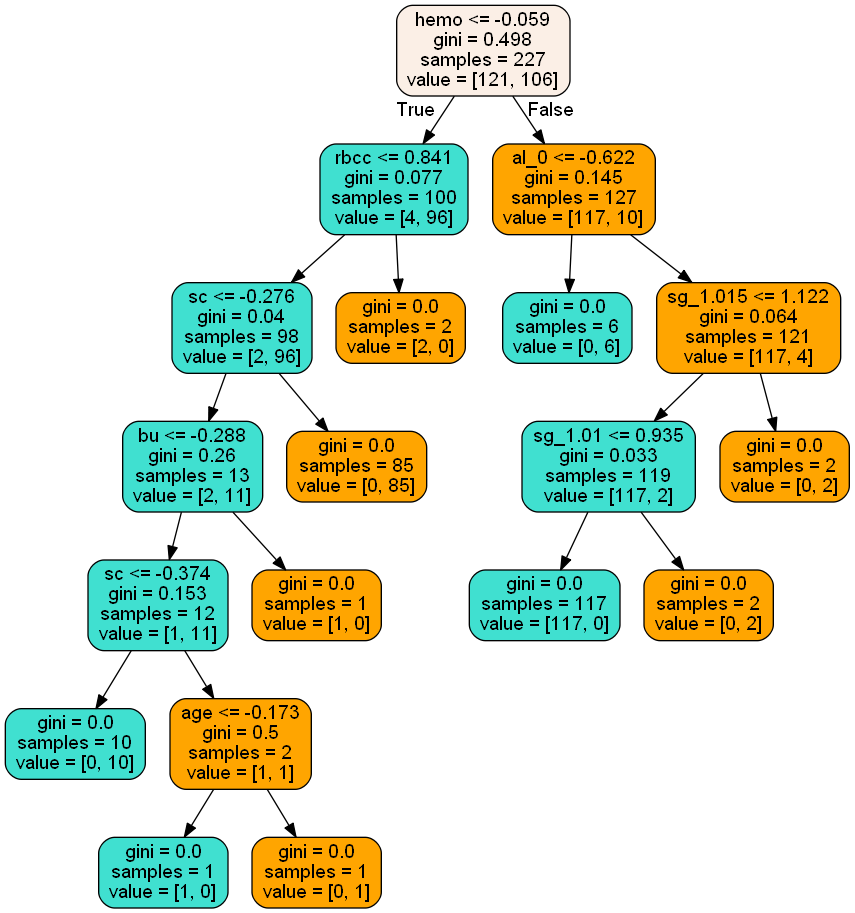

In [36]:
import collections
import pydotplus
from IPython.display import Image 

dot_data = tree.export_graphviz(clf_tree,
                                feature_names=df.columns.tolist(),
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# graph.write_png('tree.png')
Image(graph.create_png())

### 5. Evaluation of the trained models using the K Repeated Fold Cross validation method:
Here we set the number of folds to 5 and the repeats to 10. 

#### Define the common function for cross validation
We shall use Repeated K fold CV method

In [37]:
from sklearn.model_selection import RepeatedKFold
import math

def cross_validation(learner, X, y): 
    cv_results = {}
    errors = list()
    fold=0
    
    rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
    # X is the feature set and y is the target
    for train_index, test_index in rkf.split(X,y):
        fold = fold + 1
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        learner.fit(X_train, y_train)
        y_train_preds = learner.predict(X_train)
        y_test_preds = learner.predict(X_test)
        errors.append(accuracy_score(y_test_preds, y_test))

#     Compute statistics
    mean = sum(errors)/fold
    variance = sum([(error - mean)**2 for error in errors])/(fold)
    standardDeviation = variance**.5
    confiidenceInterval = (mean - 1.96*standardDeviation, mean + 1.96*standardDeviation)

      
    results['cv_mean'] = mean
    results['cv_variance'] = variance
    results['cv_standardDeviation'] = standardDeviation
        
    return results



#### Perform Cross validation
It will take some time for the following code to execute, since for each of the classifiers, we split the sample dataset into 5 folds and repeat that 10 times each, ie. executes 50 times for each of the classifiers.  

In [38]:
X = pd.DataFrame(df)
y = pd.DataFrame(disease_encoded)

cv_report = pd.DataFrame(columns = ['Classsifer', 'cv_mean', 'cv_variance', 'cv_standardDeviation'])
                                       
cv_results = {}
for i, clf in enumerate(classifiers):
    clf_name = clf.__class__.__name__
    cv_results[clf_name] = {}
    cv_results[clf_name][i] = cross_validation(clf, X, y)
    cv_report.loc[i] = [clf_name, cv_results[clf_name][i]['cv_mean'], cv_results[clf_name][i]['cv_variance'],
                          cv_results[clf_name][i]['cv_standardDeviation']]
cv_report

,Classsifer,cv_mean,cv_variance,cv_standardDeviation
0,LogisticRegression,0.986642,0.000216,0.014711
1,LinearDiscriminantAnalysis,0.949956,0.001025,0.032018
2,SVC,0.982393,0.000310,0.017607
3,DecisionTreeClassifier,0.956679,0.000648,0.025451
4,KNeighborsClassifier,0.960977,0.000605,0.024605
5,GaussianNB,0.982400,0.000297,0.017228
6,AdaBoostClassifier,0.983822,0.000345,0.018565
7,GradientBoostingClassifier,0.977462,0.000483,0.021987
8,ExtraTreesClassifier,0.984518,0.000279,0.016714
9,RandomForestClassifier,0.977845,0.000404,0.020109


### 6. ROC Curve

An additional metric called as Receiver Operator Characteristics(ROC) curve will be used. It plots the curve of True Positive Rate vs the False positive Rate, with a greater area under the curve indicating a better True Positive Rate for the same False Positive Rate. This can be helpful in this case as simply knowing the number of correct predictions may not suffice.
  



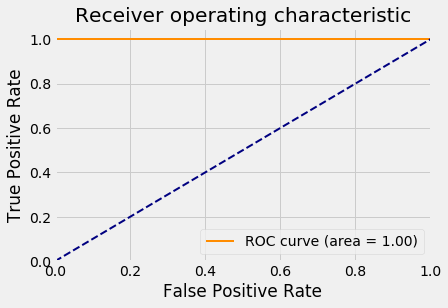

For classifier LogisticRegression, ROC score is 1.000000


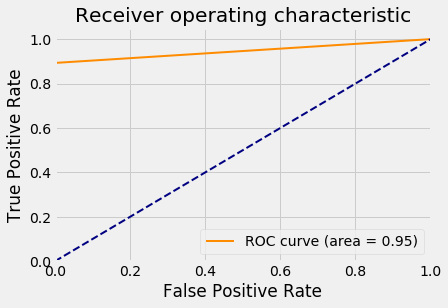

For classifier LinearDiscriminantAnalysis, ROC score is 0.946429


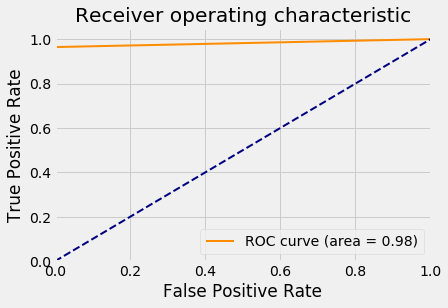

For classifier SVC, ROC score is 0.982143


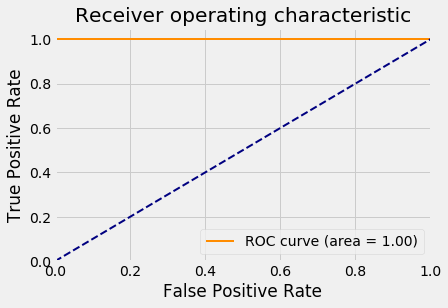

For classifier DecisionTreeClassifier, ROC score is 1.000000


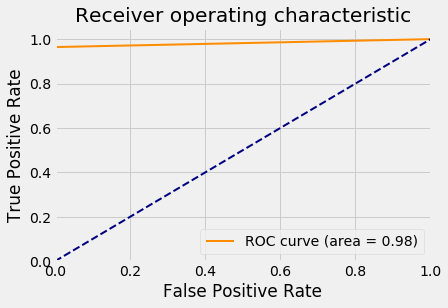

For classifier KNeighborsClassifier, ROC score is 0.982143


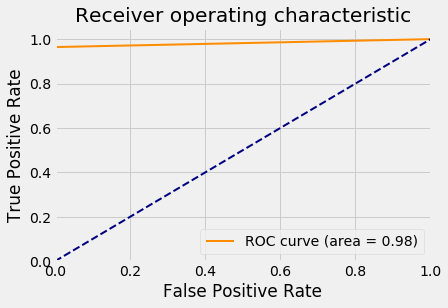

For classifier GaussianNB, ROC score is 0.982143


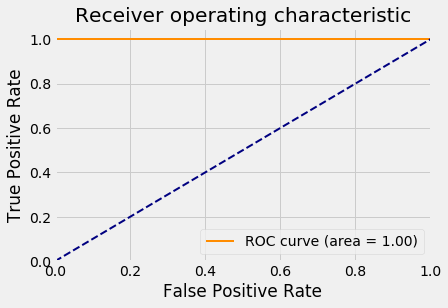

For classifier AdaBoostClassifier, ROC score is 1.000000


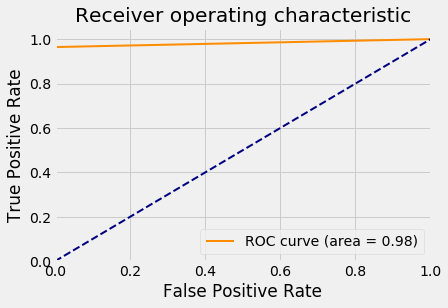

For classifier GradientBoostingClassifier, ROC score is 0.982143


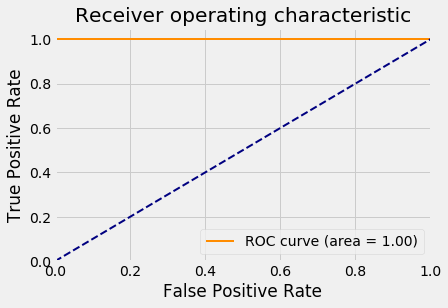

For classifier ExtraTreesClassifier, ROC score is 1.000000


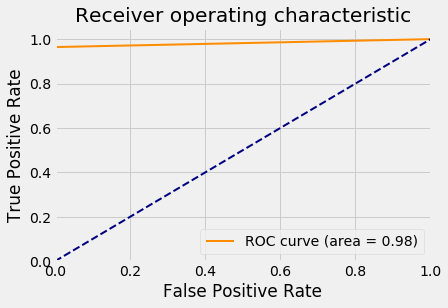

For classifier RandomForestClassifier, ROC score is 0.982143


In [39]:
#plotting ROC curve
from sklearn import metrics

for clf in classifiers:
    clf_name = clf.__class__.__name__
    pred=clf.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print ("For classifier %s, ROC score is %f"%(clf_name,roc_auc))
    #fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

### 7. Fine Tuning the Models - RandomForest, SVM, KNN classifiers
Now we will use the grid search method to see if we can improve the performance of various models with different values for the given hyperparameters. 


For classifier RandomForestClassifier:
Unoptimized model
------
Accuracy score on test data: 0.9825
F-score on test data: 0.9712

Optimized Model
------
Final accuracy score on the test data: 0.9649
Final F-score on the test data: 0.9643
Best parameters:
{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 15, 'oob_score': False}
For classifier RandomForestClassifier, ROC score is 0.964901


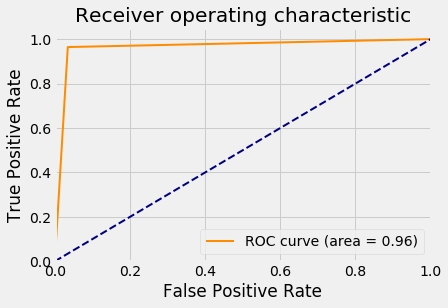


---------------------------------X----------------------------

For classifier SVC:
Unoptimized model
------
Accuracy score on test data: 0.9825
F-score on test data: 0.9712

Optimized Model
------
Final accuracy score on the test data: 1.0000
Final F-score on the test data: 1.0000
Best parameters:
{'C': 1, 'kernel': 'linear'}
For classifier SVC, ROC score is 1.000000


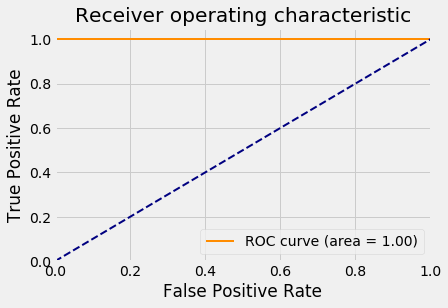


---------------------------------X----------------------------

For classifier KNeighborsClassifier:
Unoptimized model
------
Accuracy score on test data: 0.9474
F-score on test data: 0.9124

Optimized Model
------
Final accuracy score on the test data: 0.9474
Final F-score on the test data: 0.9124
Best parameters:
{'n_neighbors': 5, 'weights': 'distance'}
For classifier KNeighborsClassifier, ROC score is 0.946429


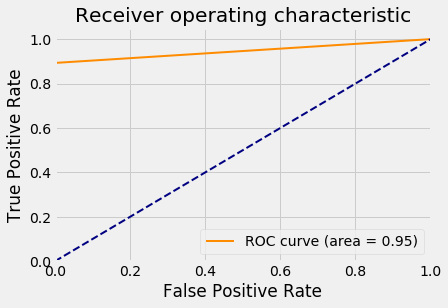


---------------------------------X----------------------------



In [40]:

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Initialize the classifier
i=0
for clf in [clf_rf, clf_svc, clf_knn]:
    clf_name = clf.__class__.__name__
    print ('For classifier %s:'%(clf_name))
    if i==0: #RandomForest
        parameters = {'max_features':['auto',None],# 'auto' option uses square root of number of features
                     'oob_score':[False,True],# setting it to 'True' saves the generalization error
                     'max_depth':[3,10,15],# depth of tree
                     'n_estimators':[3,10,15]}# number of trees
    elif i==1: #SVM
        parameters={'kernel':['poly','rbf','linear'],# different ways to separate data pts by a hyperplane
                    'C':[0.001,1,1000]} # weight of penalty assigned to error
    elif i==2: #kNearestClassifier
        parameters={'n_neighbors':[5,10,15],# number of neighbors
                    'weights':['uniform','distance']}# distance means weights are inversely proportional to distance

    scorer = make_scorer(fbeta_score, beta=2)
    grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
    grid_fit = grid_obj.fit(X_train,y_train)
    best_clf = grid_fit.best_estimator_

    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    # Report the before-and-afterscores
    print ("Unoptimized model\n------")
    print ("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("F-score on test data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
    print ("\nOptimized Model\n------")
    print ("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("Final F-score on the test data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
    print ("Best parameters:")
    print (grid_fit.best_params_)
    fpr, tpr, _ = roc_curve(y_test, best_predictions)
    roc_auc = auc(fpr, tpr)
    print ("For classifier %s, ROC score is %f"%(clf_name,roc_auc))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print ("\n---------------------------------X----------------------------\n")
    i+=1

### 8. Training the Random Forest classifier with the top 10 important features
From a medical perspective, it may be important to know which features are most influential in determining whether a person has a disease or not. Also, in future, it may be possible that more examples are collected for this dataset, and we may want to use only the k best features for this dataset for classification purpose. Keeping this in mind, we will use the RandomForestClassifier to extract the features of greatest importance. 

In [41]:
clf_new=clf_rf.fit(X_train,y_train)#clf_A is RandomForestClassifier
imp_features = clf_new.feature_importances_

In [42]:
from sklearn.base import clone

X_train_reduced = X_train[X_train.columns.values[(np.argsort(imp_features)[::-1])[:10]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(imp_features)[::-1])[:10]]]
print ("top 10 important features are", X_train_reduced.columns)
print ("\n")

clf = (clone(clf_rf)).fit(X_train_reduced, y_train)#seeing how using only 10 best features affects RandomForestClassifier
predictions=clf_rf.predict(X_test)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from Random Forest using both versions of data
print ("Final Model trained on full data\n------")
print ("Accuracy on test data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on test data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on test data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on test data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

top 10 important features are Index(['pcv', 'sc', 'hemo', 'dm_yes', 'rbcc', 'htn_no', 'bp', 'sg_1.015',
       'age', 'al_1'],
      dtype='object')


Final Model trained on full data
------
Accuracy on test data: 0.9825
F-score on test data: 0.9926

Final Model trained on reduced data
------
Accuracy on test data: 0.9298
F-score on test data: 0.9470


### Results of feature reduction
Using only 10 most important features leads to a reduction in accuracy by around 5% and F-score by around 5%. Maybe in future
if number of data points is very large and we are willing to save some training time at the cost of accuracy, we can use this method.  

### 9. Conclusion-Final Model Evaluation
Random Forest classifier seems to be giving, realtively the realistic accuracy among the other models. All the other classifiers seem to be overfitting. Partly, it is also because of the small size of the dataset.  

### Random forest classifier:
**Final Model trained on full data – before fine tuning**
> Accuracy on test data: 0.9825<br>
> F-score on test data: 0.9926

**Final Model trained on full data – after fine tuning**
> Final accuracy score on the test data: 0.9474<br>
> Final F-score on the test data: 0.9124

**Final Model trained on reduced data**
> Accuracy on test data: 0.9298<br>
> F-score on test data: 0.9470

**Cross validation**
> Number of folds: 5, Repeat: 10<br>
> Accuracy Mean: 0.971817<br>
> Variance: 0.000544<br>
> Std.Dev: 0.023329